In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
O3 = pd.read_csv('data/O3trim.csv')

In [4]:
O3

,Date,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
0,2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
1,2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2,2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
3,2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
4,2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...,...
8020868,2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
8020869,2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
8020870,2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41
8020871,2021-06-29,Wyoming,Weston,Not in a city,0.051118,0.052,10,48


In [5]:
O3['Date'] = pd.to_datetime(O3['Date'])
df = O3.copy()

In [6]:
df

,Date,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
0,2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
1,2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2,2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
3,2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
4,2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...,...
8020868,2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
8020869,2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
8020870,2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41
8020871,2021-06-29,Wyoming,Weston,Not in a city,0.051118,0.052,10,48


In [7]:
df.set_index('Date', inplace=True)

In [8]:
df

,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
Date,,,,,,,
2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41


In [9]:
df.describe().apply(lambda x: x.apply('{0:3f}'.format))

,Mean,1st Max Value,1st Max Hour,O3 AQI
count,8020873.000000,8020873.000000,8020873.000000,8020873.000000
mean,0.032110,0.041937,10.802424,42.507463
std,0.012388,0.014386,3.171269,22.650060
min,-0.003444,-0.003000,7.000000,0.000000
25%,0.023353,0.032000,9.000000,30.000000
50%,0.031765,0.041000,10.000000,38.000000
75%,0.040235,0.051000,11.000000,47.000000
max,0.135529,0.183000,23.000000,282.000000


In [10]:
date_aqi = df[['O3 AQI']]
date_aqi

,O3 AQI
Date,
2000-02-29,21
2000-03-01,43
2000-03-02,74
2000-03-03,34
2000-03-04,35
...,...
2021-06-26,41
2021-06-27,40
2021-06-28,41


array([[<AxesSubplot:title={'center':'O3 AQI'}>]], dtype=object)

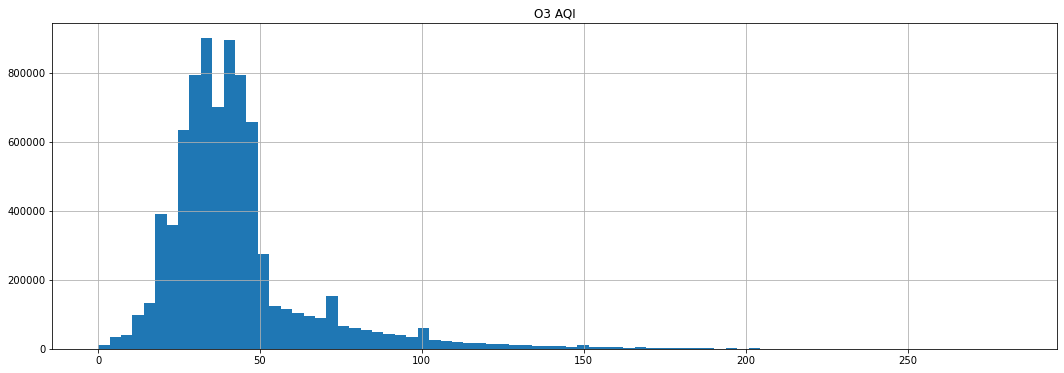

In [11]:
date_aqi.hist(figsize=(18,6), bins=80)

<AxesSubplot:xlabel='Date'>

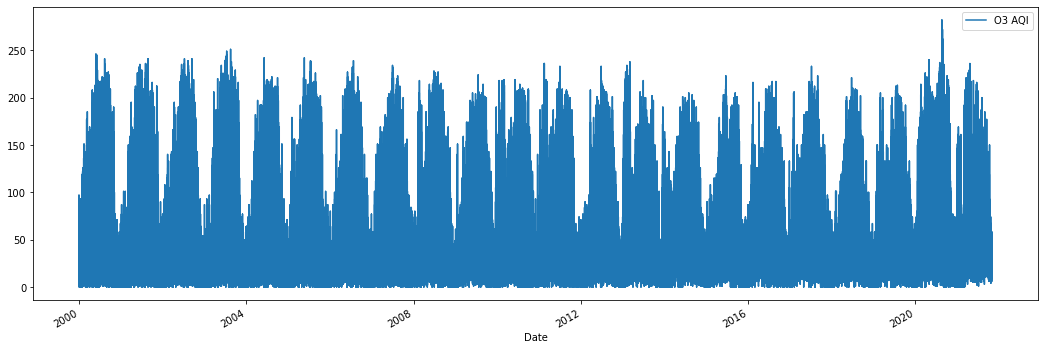

In [12]:
date_aqi.plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

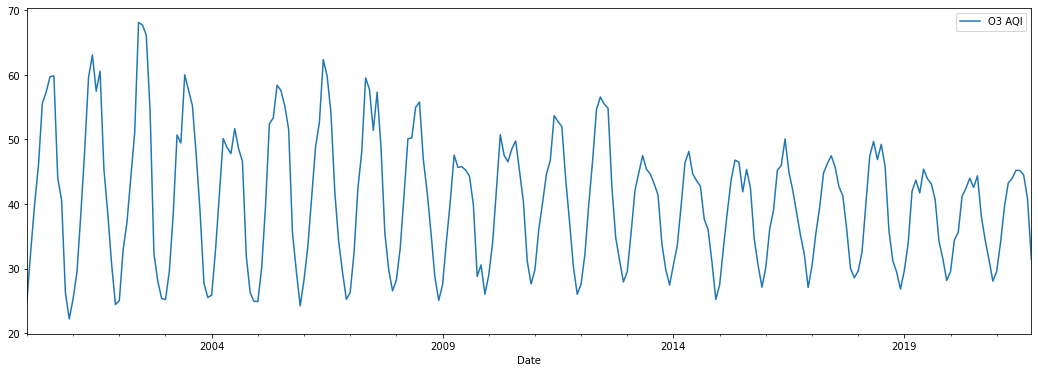

In [13]:
aqi_monthly = date_aqi.resample('MS')
all_monthly = aqi_monthly.mean()
all_monthly.plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

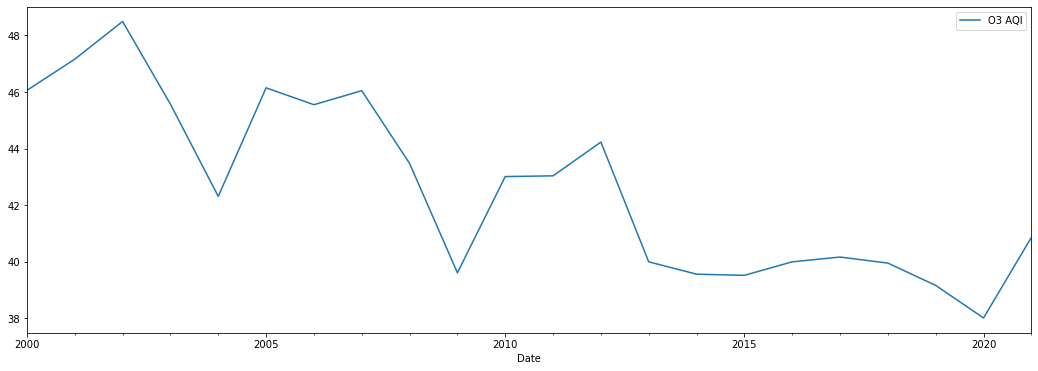

In [14]:
aqi_yearly = date_aqi.resample('YS')
all_yearly = aqi_yearly.mean()
all_yearly.plot(figsize=(18,6))

In [15]:
O3[O3['O3 AQI']>200]

,Date,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
168,2000-08-18,Alabama,Baldwin,Fairhope,0.096588,0.110,15,205
1251,2000-08-17,Alabama,Jefferson,Birmingham,0.055000,0.113,10,208
2536,2000-08-17,Alabama,Jefferson,Pinson,0.064294,0.108,10,203
3028,2000-08-17,Alabama,Jefferson,Tarrant (corporate name for Tarrant City),0.057824,0.111,10,206
4761,2000-08-15,Alabama,Shelby,Helena,0.064412,0.111,10,206
...,...,...,...,...,...,...,...,...
7798890,2021-06-27,California,San Bernardino,Redlands,0.071471,0.112,10,207
7798891,2021-06-28,California,San Bernardino,Redlands,0.068647,0.112,10,207
7799329,2021-06-16,California,San Bernardino,San Bernardino,0.055706,0.107,10,202
7805100,2021-05-21,California,Santa Clara,San Martin,0.093882,0.122,14,218


In [16]:
df

,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
Date,,,,,,,
2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41


In [17]:
df_city = O3.copy()
df_city = df_city[['Date', 'State', 'City', 'O3 AQI']]
# df_city = df.groupby(['Date', 'City']).mean()

df_city_group = df_city.groupby(['State', 'Date']).max().groupby(level=0)
df_city_group

Text(0.5, 1.0, 'O3 AQI')

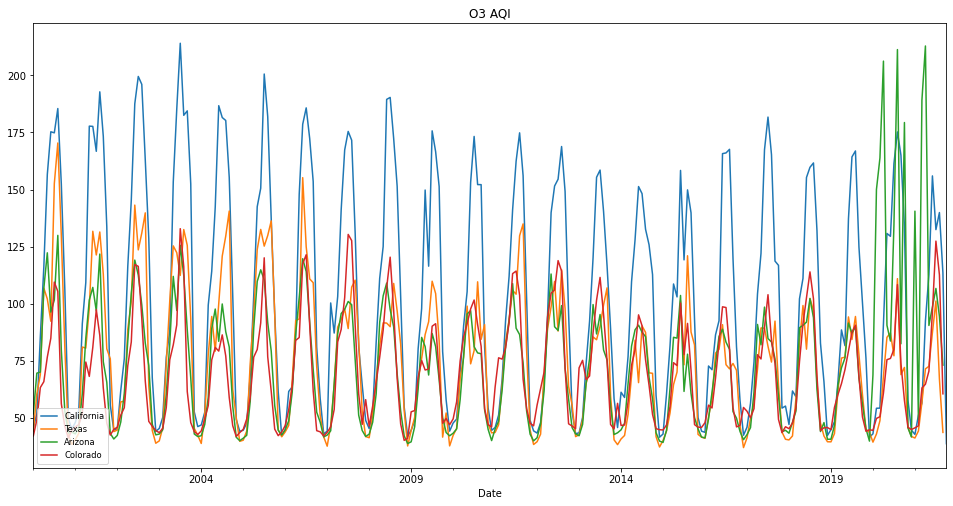

In [18]:
plt.figure(figsize=(36,18))

plt.subplot(221)
O3aqi = df_city_group['O3 AQI']
O3top = O3aqi.mean().nlargest(4).index
for i in range(len(O3top)):
    O3aqi.get_group(O3top[i]).groupby(pd.Grouper(level='Date',freq='M')).mean().plot()
plt.legend(O3top,loc=3,fontsize='small')
plt.title('O3 AQI')

In [19]:
O3top

Index(['California', 'Texas', 'Arizona', 'Colorado'], dtype='object', name='State')

In [21]:
poll = pd.read_csv("data/pollution_us_2000_2016.csv")

In [22]:
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num',
                  'Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

In [23]:
pollStGrouped

Text(0.5, 1.0, 'O3 AQI')

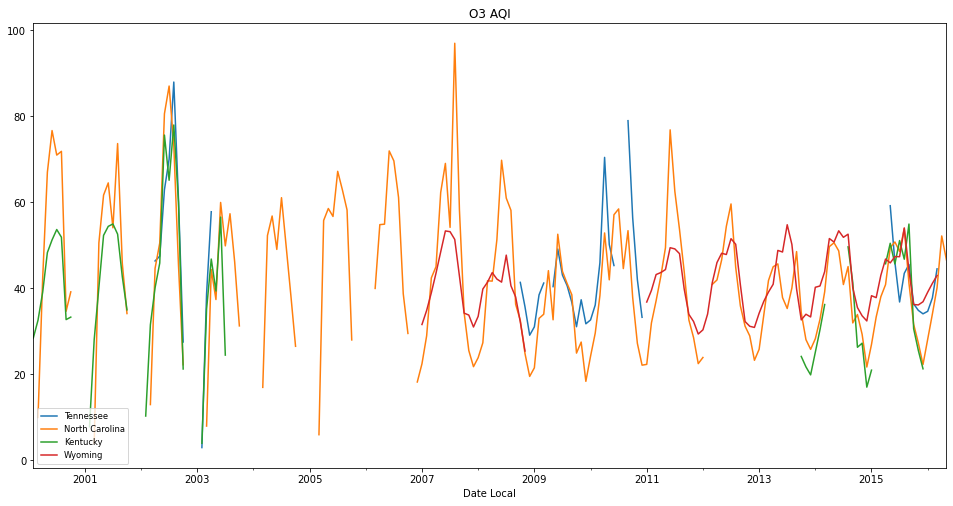

In [25]:
plt.figure(figsize=(36, 18))

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(4).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

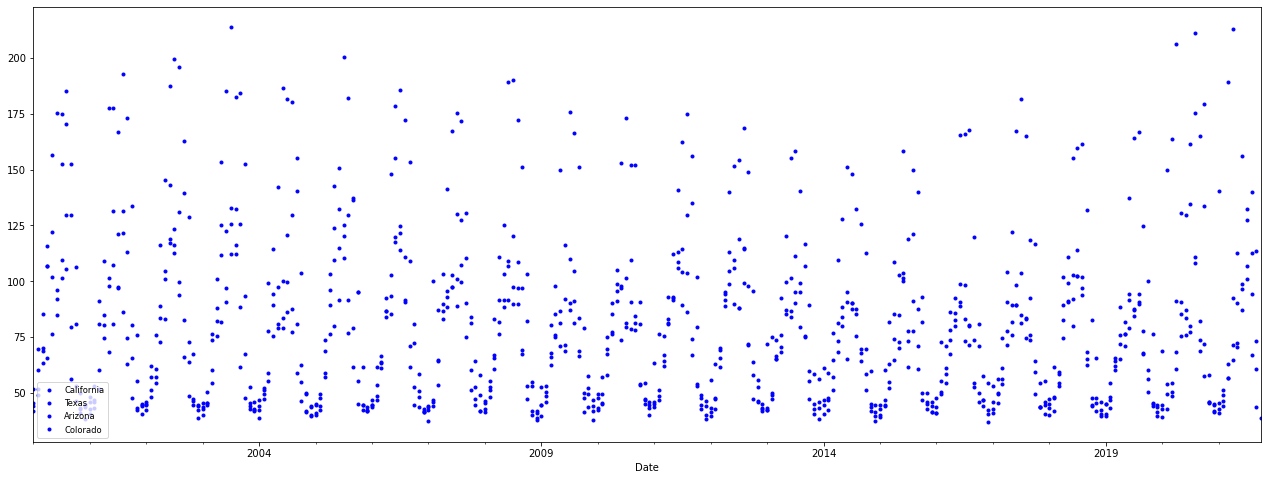

In [30]:
plt.figure(figsize=(22,8))
for i in range(len(O3top)):
    O3aqi.get_group(O3top[i]).groupby(pd.Grouper(level='Date',freq='M')).mean().plot(style='b.')
plt.legend(O3top,loc=3,fontsize='small')
plt.show()

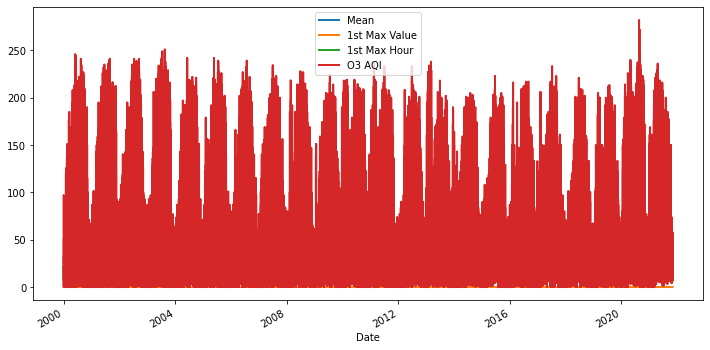

In [35]:
# Plot the time series data
df.plot(figsize=(12,6), linewidth=2, fontsize=10);

In [40]:
# Determine rolling statistics
roll_mean = df.rolling(window=36, center=False).mean()
roll_std = df.rolling(window=36, center=False).std()

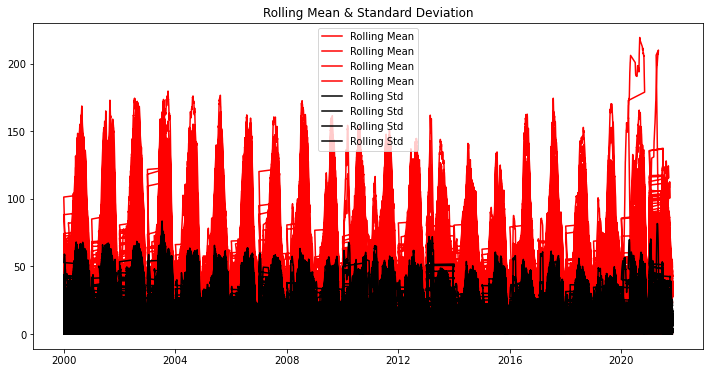

In [41]:
"""
try new dataframe by limiting certain dates or increasing window size
"""


# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
# plt.plot(df, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(df['O3 AQI'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

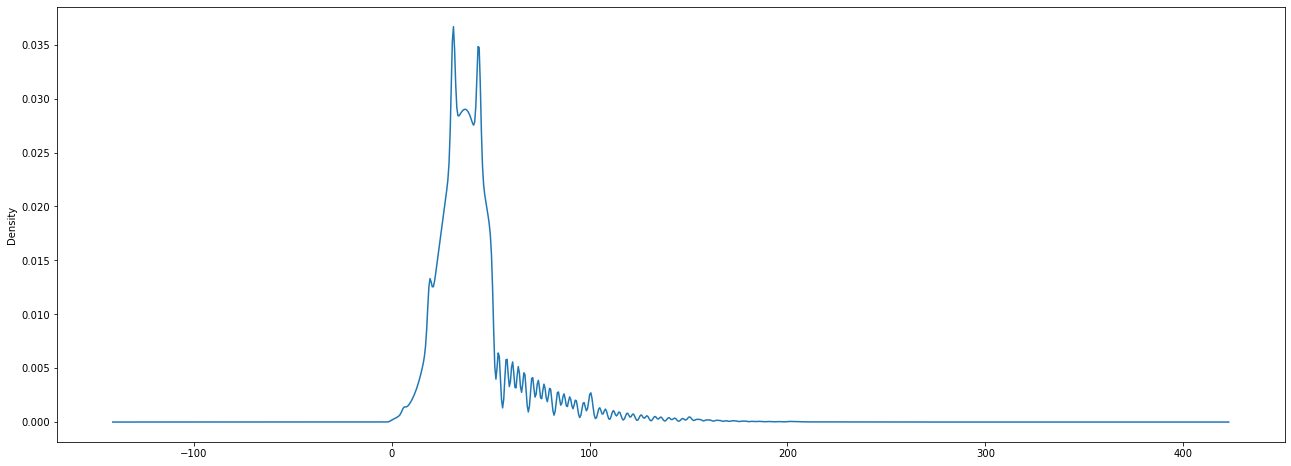

In [45]:
df['O3 AQI'].plot(figsize=(22,8), kind='kde');

In [46]:
df

,State,County,City,Mean,1st Max Value,1st Max Hour,O3 AQI
Date,,,,,,,
2000-02-29,Alabama,Baldwin,Fairhope,0.023000,0.023,23,21
2000-03-01,Alabama,Baldwin,Fairhope,0.036471,0.046,11,43
2000-03-02,Alabama,Baldwin,Fairhope,0.037765,0.062,11,74
2000-03-03,Alabama,Baldwin,Fairhope,0.034941,0.037,10,34
2000-03-04,Alabama,Baldwin,Fairhope,0.028882,0.038,11,35
...,...,...,...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,0.036647,0.044,7,41
2021-06-27,Wyoming,Weston,Not in a city,0.041176,0.043,9,40
2021-06-28,Wyoming,Weston,Not in a city,0.042941,0.044,8,41


In [48]:
O3aqionly = df.drop(['Mean', '1st Max Value', '1st Max Hour'], axis=1)
O3aqionly

,State,County,City,O3 AQI
Date,,,,
2000-02-29,Alabama,Baldwin,Fairhope,21
2000-03-01,Alabama,Baldwin,Fairhope,43
2000-03-02,Alabama,Baldwin,Fairhope,74
2000-03-03,Alabama,Baldwin,Fairhope,34
2000-03-04,Alabama,Baldwin,Fairhope,35
...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,41
2021-06-27,Wyoming,Weston,Not in a city,40
2021-06-28,Wyoming,Weston,Not in a city,41


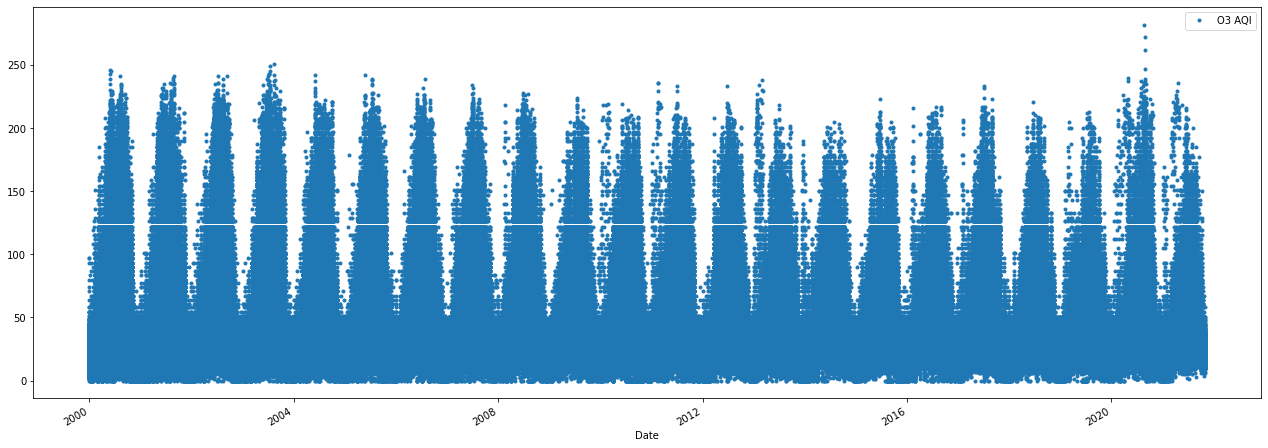

In [51]:
# Plot the time series data
O3aqionly.plot(figsize=(22,8), style='.');

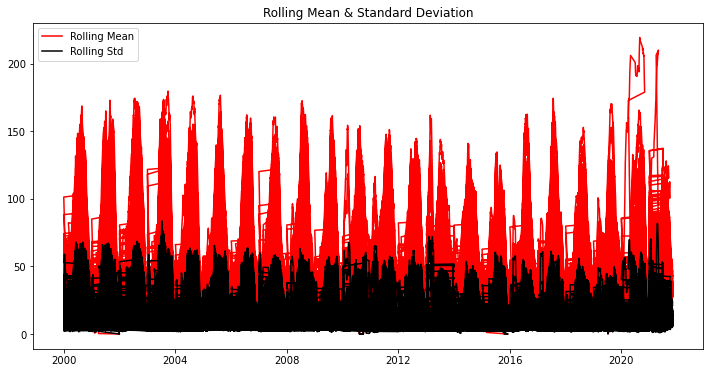

In [53]:
"""
try new dataframe by limiting certain dates or increasing window size
"""

# Determine rolling statistics
roll_mean = O3aqionly.rolling(window=36, center=False).mean()
roll_std = O3aqionly.rolling(window=36, center=False).std()

# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
# plt.plot(O3aqionly, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

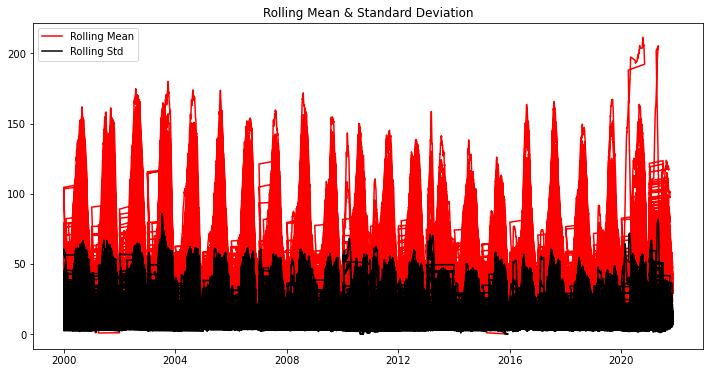

In [55]:
"""
try new dataframe by limiting certain dates or increasing window size
"""

# Determine rolling statistics
roll_mean = O3aqionly.rolling(window=48, center=False).mean()
roll_std = O3aqionly.rolling(window=48, center=False).std()

# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
# plt.plot(O3aqionly, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [58]:
# Use pandas grouper to group values using annual frequency
year_groups = O3aqionly.groupby(pd.Grouper(freq ='A'))

In [59]:
# Create a new DataFrame and store yearly values in columns  
temp_annual = pd.DataFrame() 

for yr, group in year_groups:
    temp_annual[yr.year] = group.values.ravel()

# Plot the yearly groups as subplots
temp_annual.plot(figsize = (22,15), subplots=True, legend=True)
plt.show()

ValueError: Length of values (1340908) does not match length of index (1294412)

In [60]:
temp_annual

,2000
0,Alabama
1,DeKalb
2,Crossville
3,35
4,Alabama
...,...
1294407,40
1294408,Wyoming
1294409,Teton
1294410,Not in a city


In [63]:
O3ts = O3.drop(['Mean', '1st Max Value', '1st Max Hour'], axis=1)
O3ts.set_index('Date', inplace=True)
O3ts

,State,County,City,O3 AQI
Date,,,,
2000-02-29,Alabama,Baldwin,Fairhope,21
2000-03-01,Alabama,Baldwin,Fairhope,43
2000-03-02,Alabama,Baldwin,Fairhope,74
2000-03-03,Alabama,Baldwin,Fairhope,34
2000-03-04,Alabama,Baldwin,Fairhope,35
...,...,...,...,...
2021-06-26,Wyoming,Weston,Not in a city,41
2021-06-27,Wyoming,Weston,Not in a city,40
2021-06-28,Wyoming,Weston,Not in a city,41


In [64]:
O3ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8020873 entries, 2000-02-29 to 2021-06-30
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   State   object
 1   County  object
 2   City    object
 3   O3 AQI  int64 
dtypes: int64(1), object(3)
memory usage: 306.0+ MB


In [71]:
O3ts.groupby('State')

In [72]:
O3ts_state = O3ts.groupby('State')

In [73]:
O3ts_state

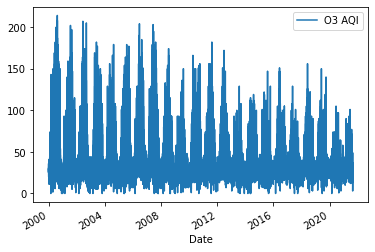

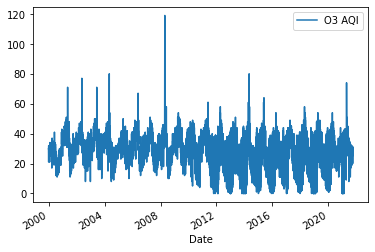

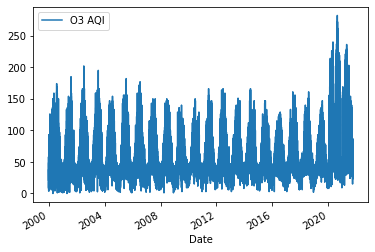

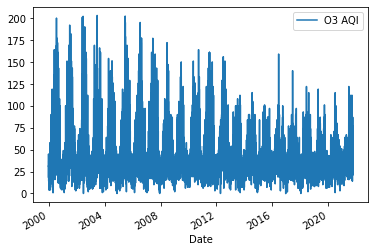

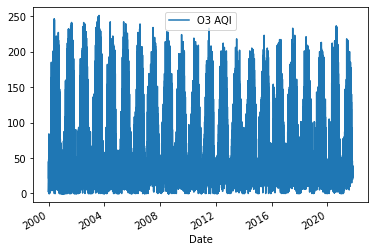

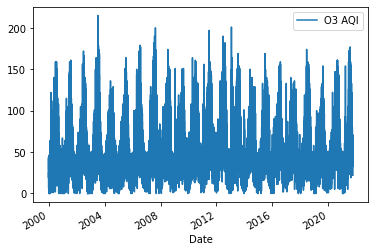

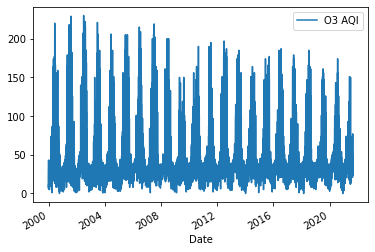

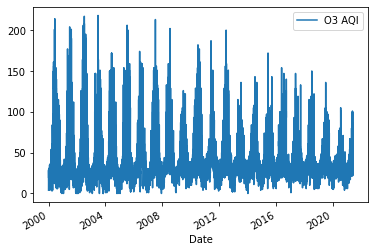

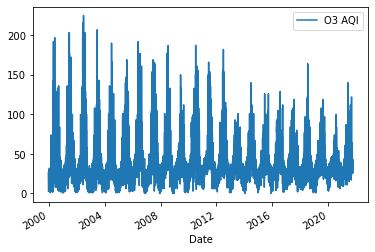

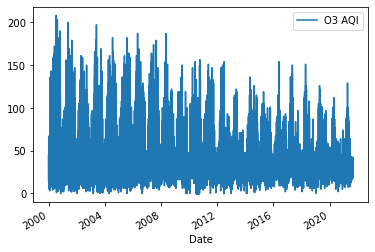

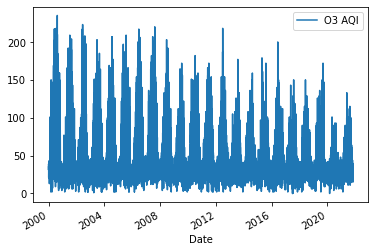

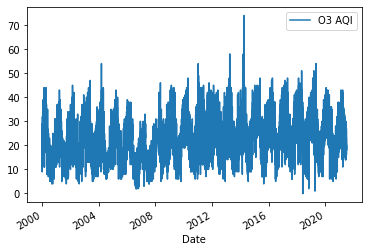

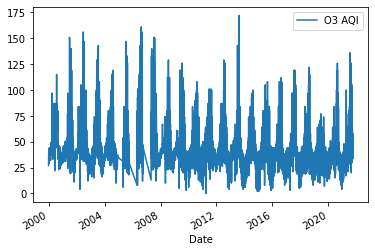

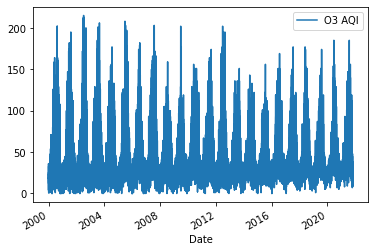

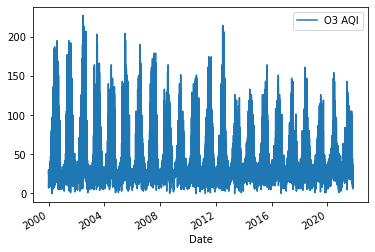

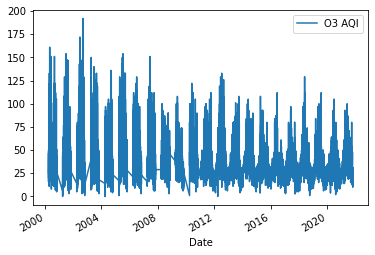

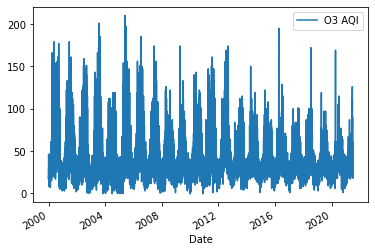

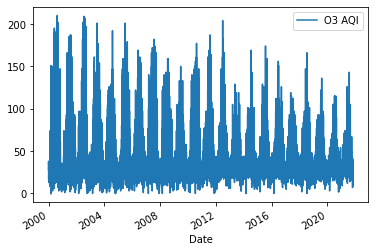

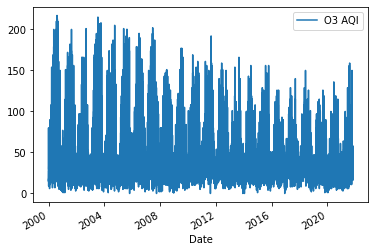

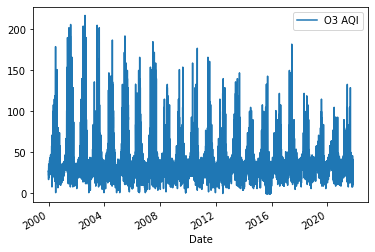

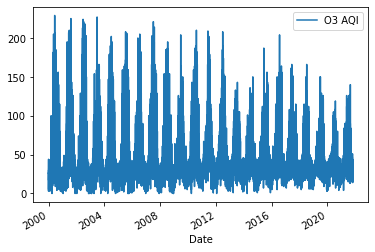

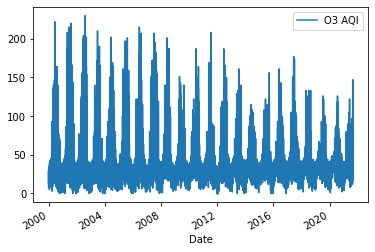

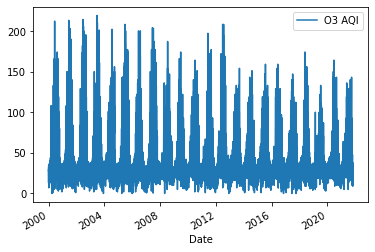

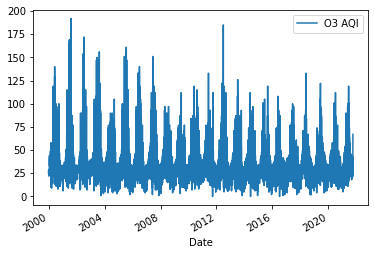

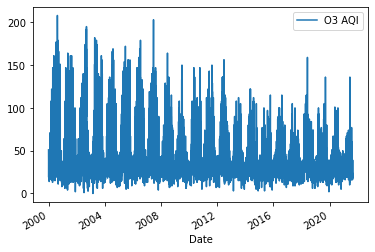

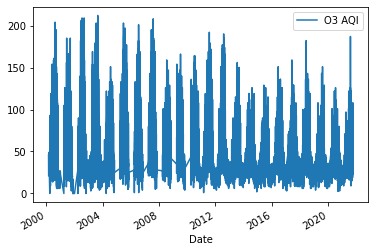

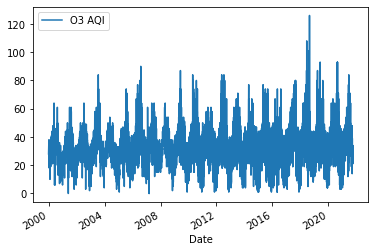

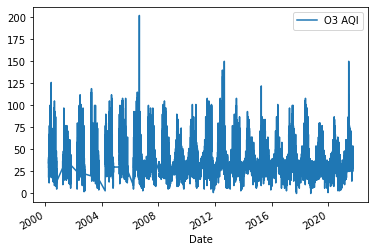

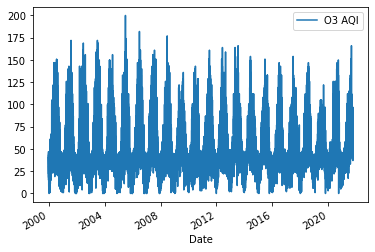

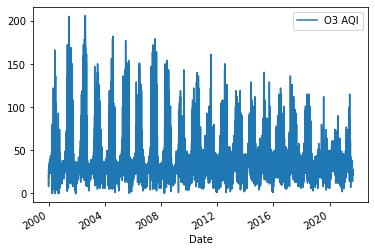

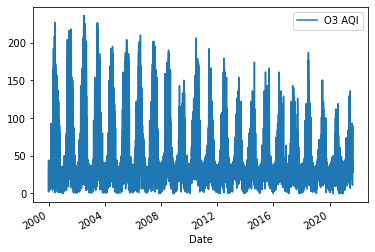

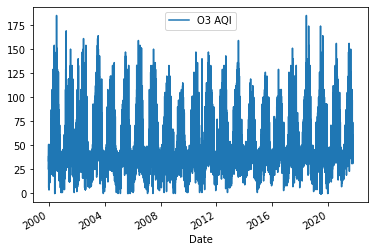

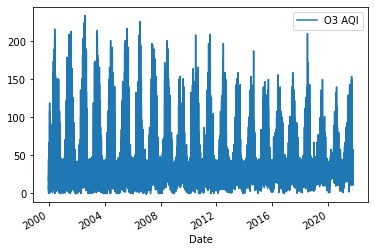

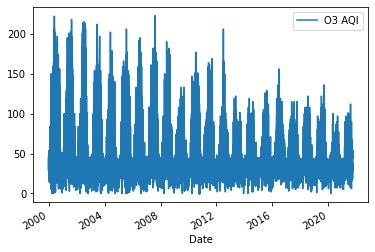

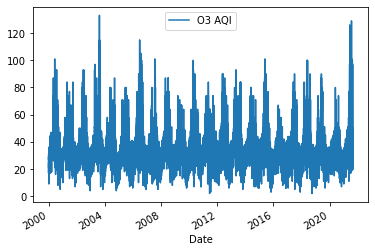

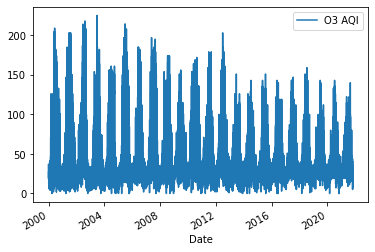

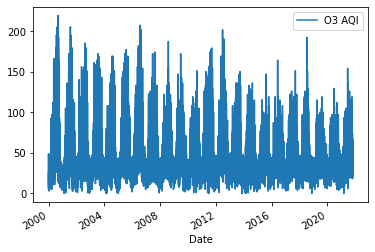

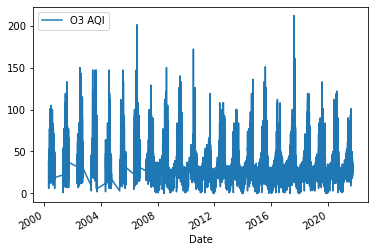

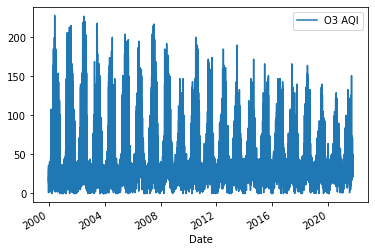

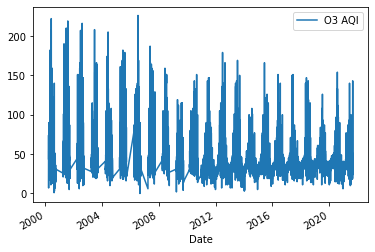

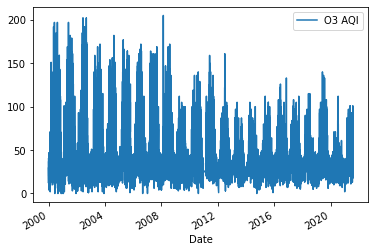

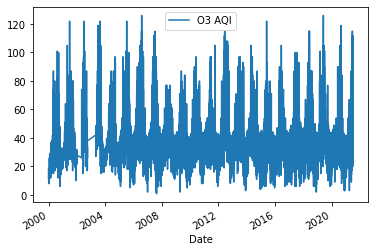

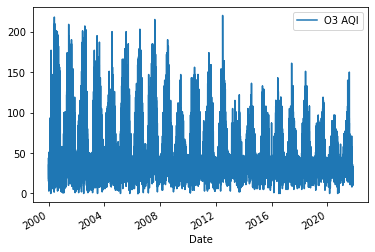

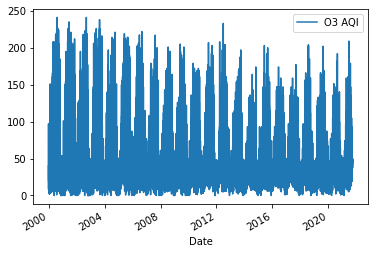

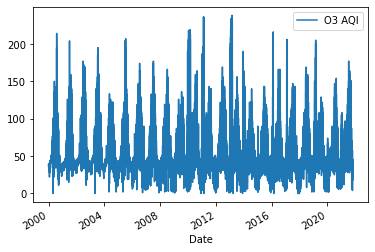

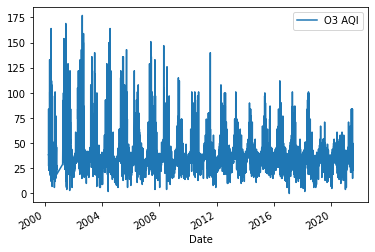

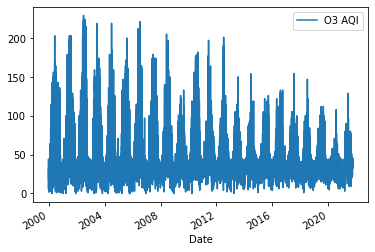

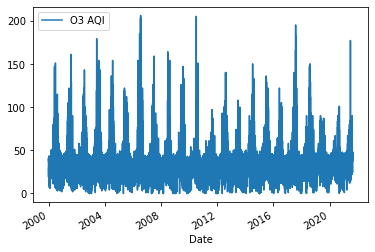

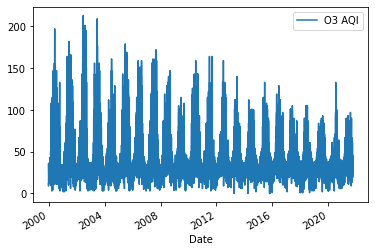

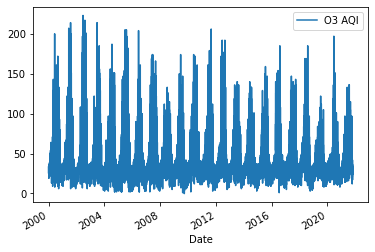

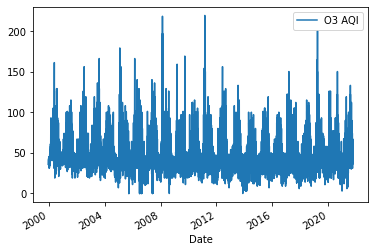

In [78]:
O3ts_state.plot();

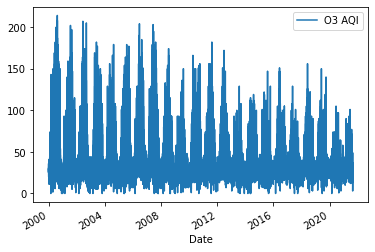

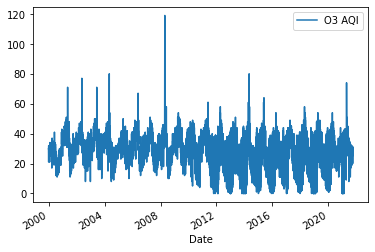

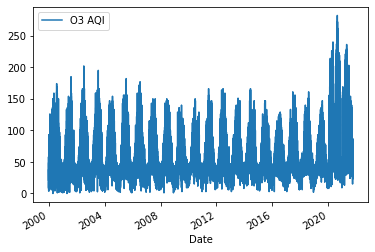

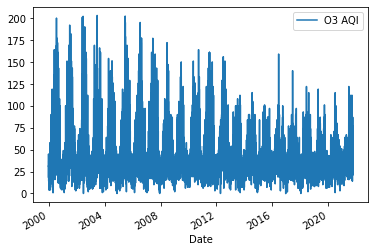

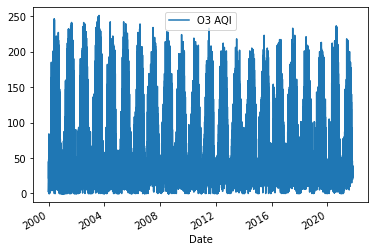

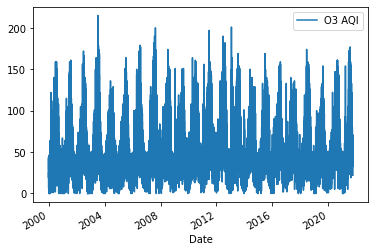

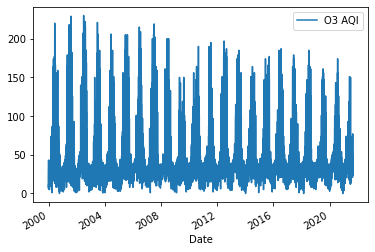

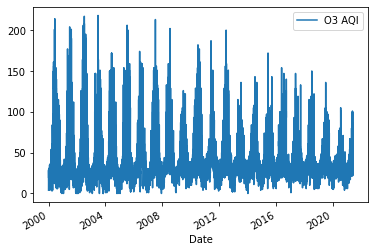

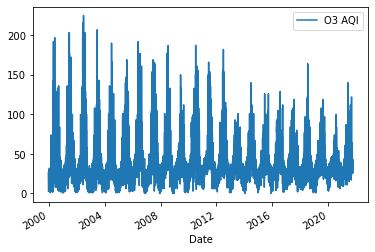

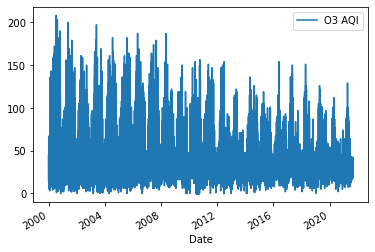

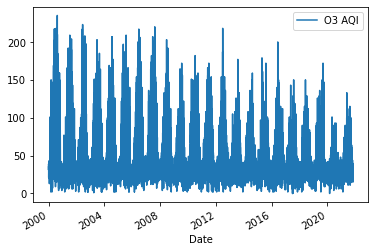

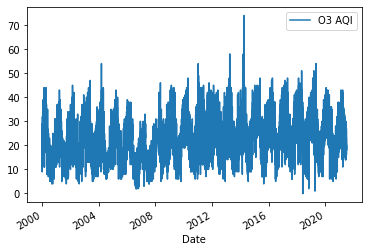

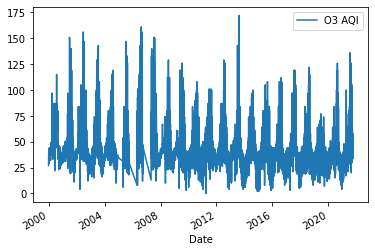

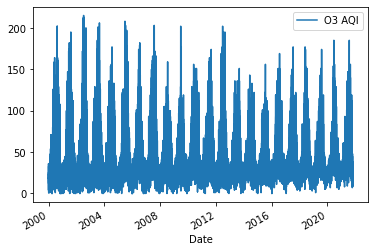

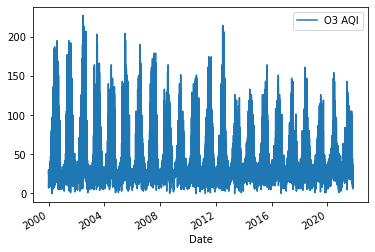

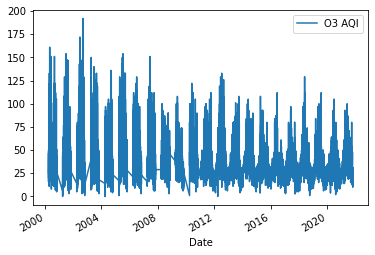

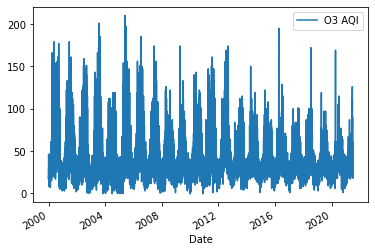

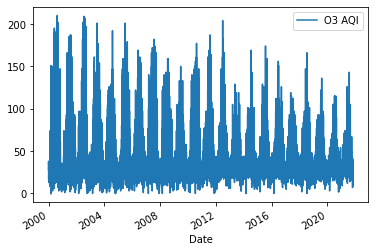

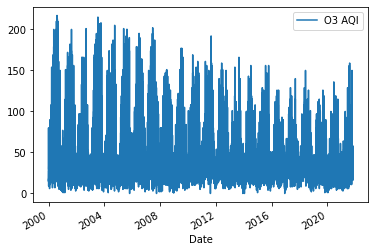

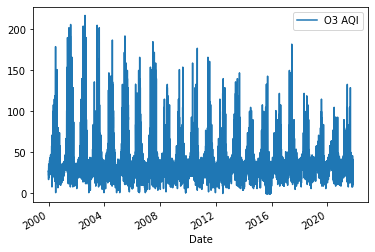

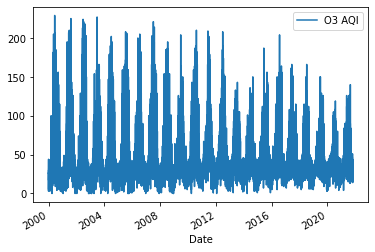

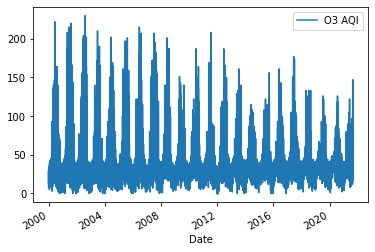

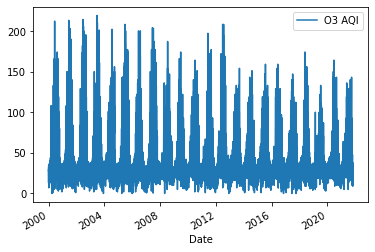

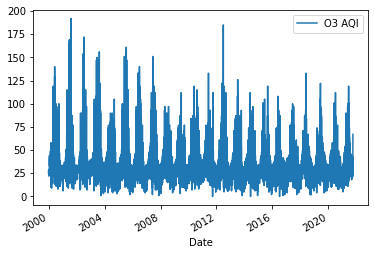

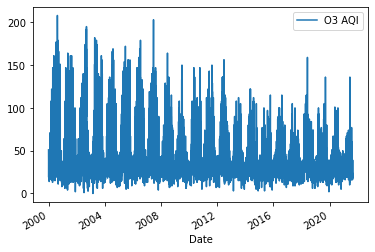

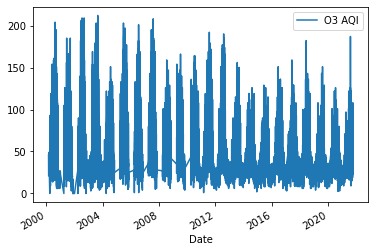

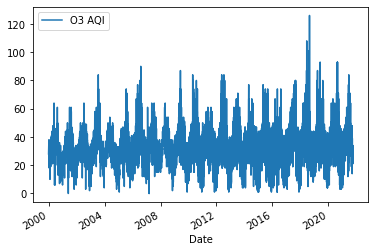

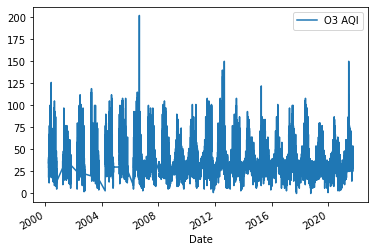

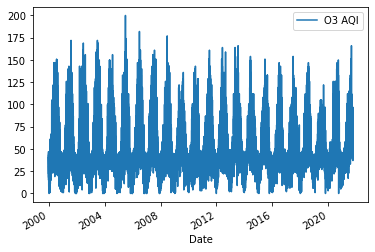

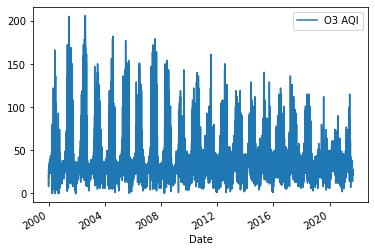

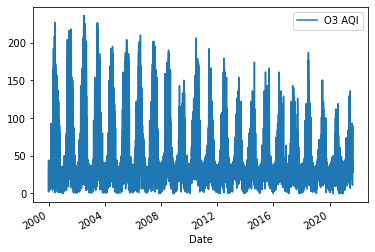

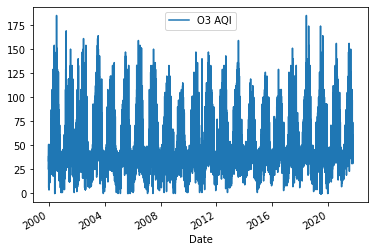

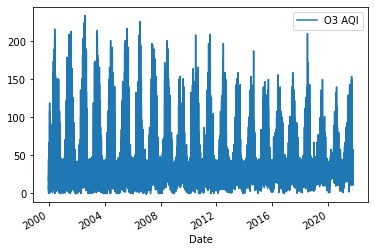

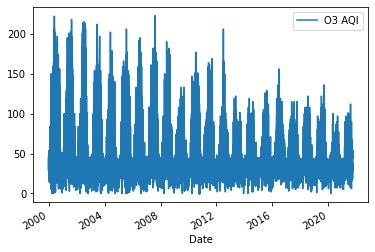

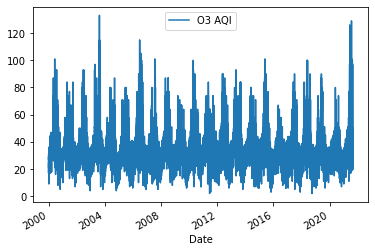

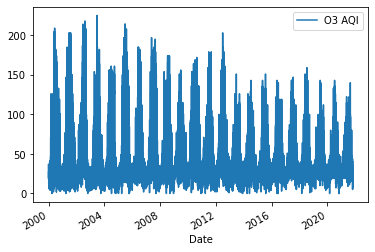

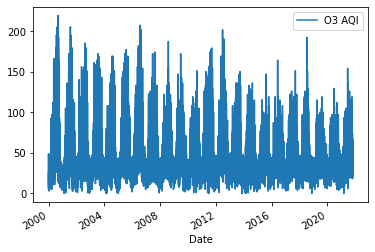

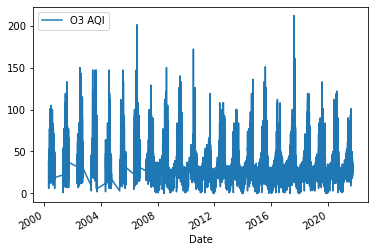

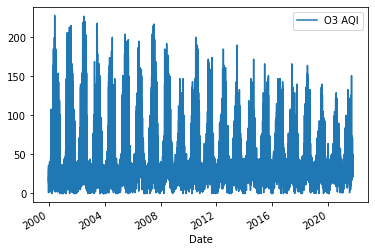

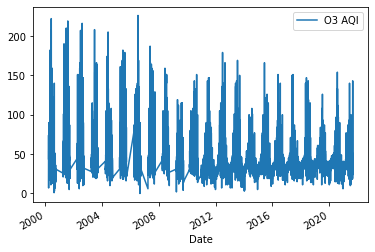

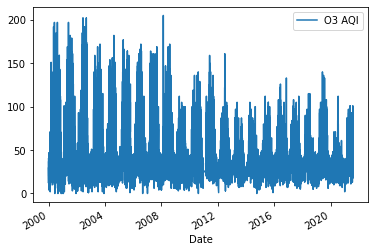

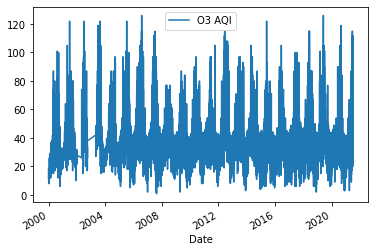

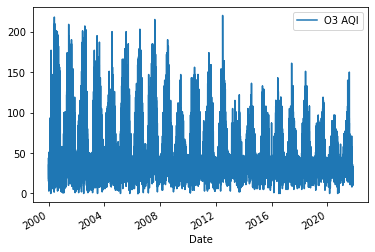

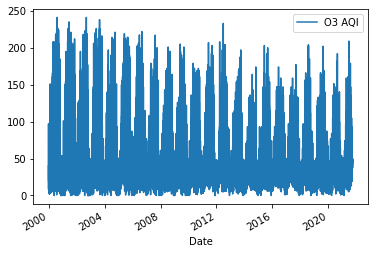

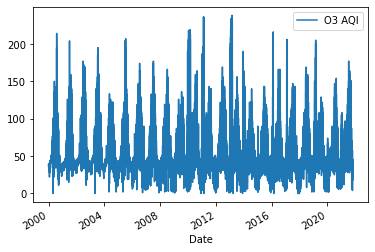

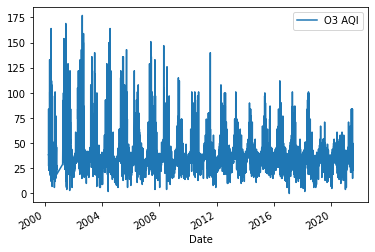

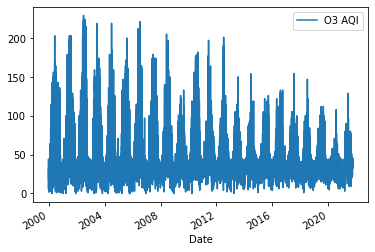

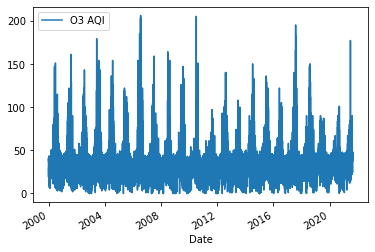

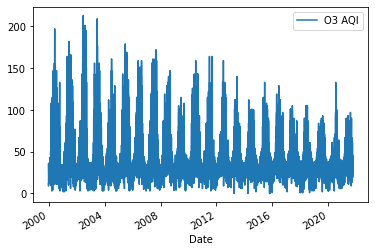

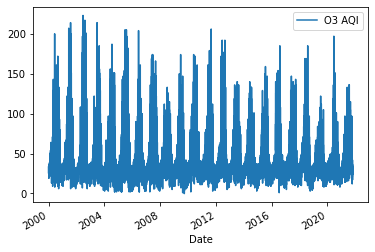

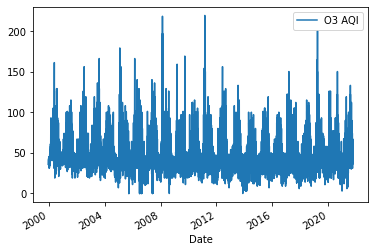

In [81]:
O3ts.groupby(pd.Grouper('State')).plot();